In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from pathlib import Path


def convert_duration(dataframe):
    dataframe["duration"] = dataframe["duration_ms"].divide(60000)
    dataframe.drop("duration_ms", axis=1, inplace=True)
    return dataframe


stones_features = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/rolling_stones_features.pkl"
stones_features_raw = pd.read_pickle(stones_features)
stones_features = stones_features_raw.copy()

columns_to_drop = [
    "type",
    "id",
    "uri",
    "track_href",
    "analysis_url",
    "time_signature",
    "trackId",
    "artistName",
    "albumName",
    "trackName",
]
# dropping unhelpful features
stones_features.drop(columns_to_drop, inplace=True, axis=1)
stones_features = convert_duration(stones_features)

/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
trained_model_dir = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/ml_stuff/trained_model.h5"
model = keras.models.load_model(trained_model_dir)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 711
Trainable params: 711
Non-trainable params: 0
_________________________________________________________________


In [3]:
X = stones_features.copy()
from sklearn.preprocessing import StandardScaler
standard_scalar  = StandardScaler()
X = standard_scalar.fit_transform(X)

In [4]:
x_test = X[0]
x_test = x_test.reshape(1,12)
print(x_test.shape)

(1, 12)


In [5]:
model.predict(x_test)

array([[0.8252713]], dtype=float32)

In [6]:
predictions = {"artist":[], "track":[], "predicted_playcount":[]}

In [7]:
X = X[:1000]
for count, track in enumerate(X):
    predictions["artist"].append(stones_features_raw["artistName"].iloc[count])
    predictions["track"].append(stones_features_raw["trackName"].iloc[count])
    track = X[count].reshape(1,12)
    predictions["predicted_playcount"].append(model.predict(track))
    if count % 100 == 0:
        print(f"{count} of {len(X)}")

0 of 1000
100 of 1000
200 of 1000
300 of 1000
400 of 1000
500 of 1000
600 of 1000
700 of 1000
800 of 1000
900 of 1000


In [8]:
len(predictions["artist"])

1000

In [9]:
predictions_df = pd.DataFrame(predictions)

In [10]:
predictions_df["predicted_playcount"] = predictions_df["predicted_playcount"].astype(float)

In [11]:
predictions_df.loc[predictions_df["predicted_playcount"].idxmax()]

artist                  Pink Floyd
track                  Speak to Me
predicted_playcount       1.036319
Name: 651, dtype: object

In [12]:
# current_directory = os.getcwd()
# pickle_name = "test_prediction_dataframe.pkl"
# predictions_df.to_pickle(os.path.join(current_directory, pickle_name))

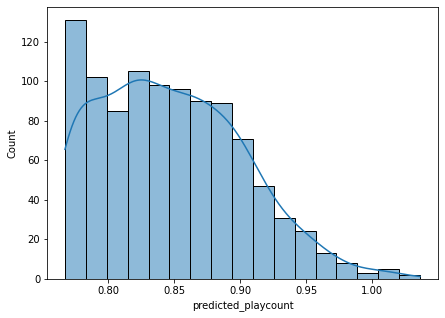

In [13]:
fig, ax = plt.subplots(figsize=(7,5));
ax = sns.histplot(data = predictions_df, x = "predicted_playcount", stat = "count", kde = True)

In [14]:
predictions_df.sort_values(by = "predicted_playcount", ascending = False)[:10]

,artist,track,predicted_playcount
651,Pink Floyd,Speak to Me,1.036319
945,Radiohead,Treefingers,1.023779
372,Fleetwood Mac,"Songbird - Instrumental, Take 10",1.018808
950,Radiohead,Motion Picture Soundtrack,1.008575
951,Radiohead,Untitled,1.007845
401,U2,Mothers Of The Disappeared,1.005769
655,Pink Floyd,The Great Gig in the Sky,1.005021
26,The Beach Boys,Let's Go Away For Awhile - Stereo / Remastered,1.002322
384,Fleetwood Mac,"Brushes (Never Going Back Again) - Sessions, R...",1.001682
433,U2,One Tree Hill Reprise - Brian Eno 2017 Mix,0.991102


In [15]:
#check features match artist/track. i.e check the for loop is appending correctly


In [16]:
def get_track_id(artist, track):
    trackId = stones_features_raw[((stones_features_raw["artistName"] == artist) & (stones_features_raw["trackName"] == track))]
    trackId = trackId["id"]
    return trackId

In [17]:
stones_features_raw.iloc[0]

artistName                                                The Beatles
albumName                       Sgt. Pepper's Lonely Hearts Club Band
trackName           Sgt. Pepper's Lonely Hearts Club Band - Remast...
trackId                                        4fUKE8EULjQdHF4zb0M8FO
danceability                                                    0.451
energy                                                          0.673
key                                                                 7
loudness                                                       -9.115
mode                                                                1
speechiness                                                    0.0734
acousticness                                                   0.0857
instrumentalness                                              0.00225
liveness                                                        0.797
valence                                                         0.583
tempo               

In [18]:
test_artist = stones_features_raw["artistName"].iloc[0]
test_track = stones_features_raw["trackName"].iloc[0]

In [19]:
get_track_id(test_artist, test_track) == stones_features_raw["id"].iloc[0]

0    True
Name: id, dtype: bool

In [20]:
#Checking a random sampling
import random
sample = random.sample(range(0, len(X)), 100)


In [21]:
for num in sample:
    artist = stones_features_raw["artistName"].iloc[num]
    track = stones_features_raw["trackName"].iloc[num]
    test = get_track_id(artist, track) == stones_features_raw["id"].iloc[num]
    if not test.any():
        print(f"{artist}, {track}, sample no.: {num} does not match")
print(f"Done - random sampling of {len(sample)} checked")

Done - random sampling of 100 checked
